## Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

### Ans: Dataset LInk: https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df_playstore= pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
rows , columns = df_playstore.shape
print(f'Number of rows in Google Playstore dataset : {rows}')
print(f'Number of columns in Google Playstore dataset : {columns}')

Number of rows in Google Playstore dataset : 10841
Number of columns in Google Playstore dataset : 13


## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [6]:
df_playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
## Missing Values
df_playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Droping the Outlier Value

df_playstore = df_playstore[df_playstore['Rating'] != 19]

In [9]:
df_avg_rating_by_category = df_playstore.groupby('Category')['Rating'].mean().reset_index(name='Avg_Rating')

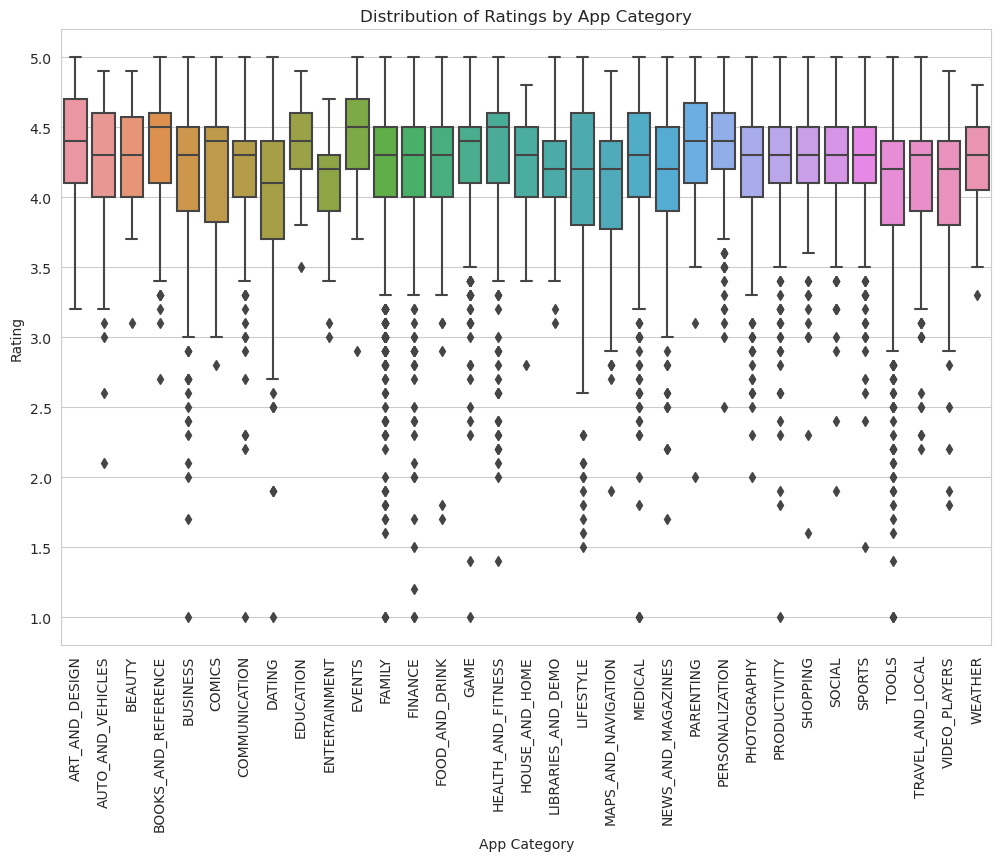

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df_playstore, order=df_avg_rating_by_category['Category'])
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by App Category')
plt.show()


## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [11]:
df_playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Insights :
1. 11474 missing values found in Rating
2. 1 Missing Value found in Type
3. 8 Missing Values found in Current Ver
4. 2 Missing Values found in Android Ver

If there are missing values in the dataset, it can affect the accuracy of descriptive statistics, correlations, and predictive models. For example, missing values in the rating column of the Google Playstore dataset may cause the mean rating to be skewed. In addition, if missing values are not handled correctly, it can result in errors during data analysis, such as dropped observations, biased estimates, or distorted results.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [12]:
# Handling the Size Variable in dataset
df_playstore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [13]:
df_playstore[df_playstore.Size=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [14]:
# Convert all units into k
import numpy as np
df_playstore['Size'] = df_playstore['Size'].str.replace('M','000')
df_playstore['Size'] = df_playstore['Size'].str.replace('k','')
df_playstore['Size'] = df_playstore['Size'].replace('Varies with device',np.nan)
df_playstore['Size'] = df_playstore['Size'].replace('1,000+','1')
df_playstore['Size'] = df_playstore['Size'].astype(float)

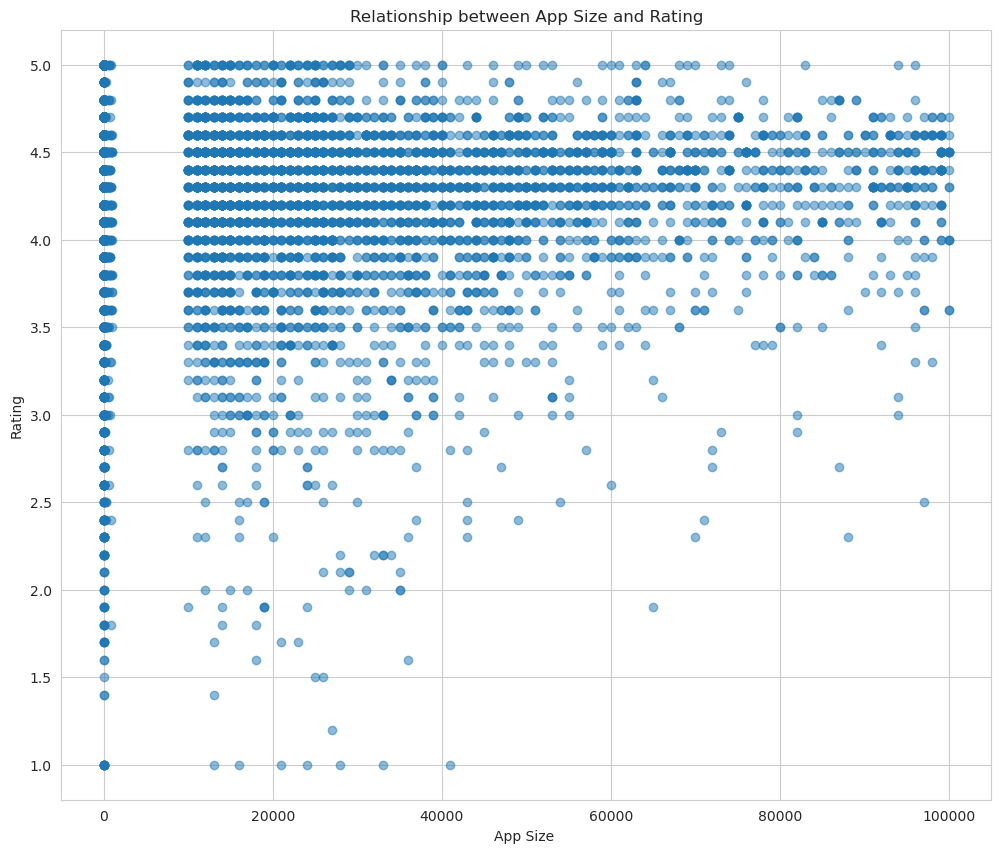

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.scatter(df_playstore['Size'], df_playstore['Rating'], alpha=0.5)
plt.xlabel('App Size ')
plt.ylabel('Rating')
plt.title('Relationship between App Size and Rating')
plt.show()


In [16]:
df_playstore.corr()

,Rating,Size
Rating,1.000000,0.082134
Size,0.082134,1.000000


### Insights :
There is no relation between ratings and size as correlation is 0 and scatter plot also shows the same.

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [17]:
#Ans:    
df_playstore.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
# Cleaning Price Column
chars_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in chars_to_remove:
    for col in columns_to_clean:
        df_playstore[col] = df_playstore[col].str.replace(items,'')

In [19]:
df_playstore['Price'] = df_playstore['Price'].astype(float)

In [20]:
df_playstore.groupby(by='Type').mean()['Price']

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<AxesSubplot: title={'center': 'Barchart of app Type vs Average Price'}, xlabel='Type'>

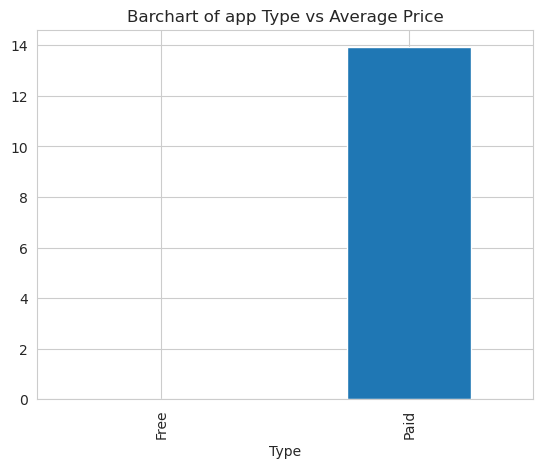

In [21]:
df_playstore.groupby(by='Type').mean()['Price'].plot(kind='bar',title='Barchart of app Type vs Average Price')

## Insights
1. Free apps have 0 average price
2. Paid apps have 13.92 average price

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [22]:
df_playstore['App'].duplicated().sum()

1181

In [23]:
df_playstore = df_playstore.drop_duplicates(subset = ['App'],keep='first')

In [24]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [25]:
df_playstore['Installs']=df_playstore['Installs'].astype(int)

In [26]:
mx = df_playstore['Installs'].max()
mx

1000000000

In [27]:
top_10_apps = df_playstore.sort_values(by=['Installs','Rating'],ascending=False).head(10)[['App','Installs','Rating']]
top_10_apps

,App,Installs,Rating
1654,Subway Surfers,1000000000,4.5
2545,Instagram,1000000000,4.5
2808,Google Photos,1000000000,4.5
336,WhatsApp Messenger,1000000000,4.4
3234,Google,1000000000,4.4
3454,Google Drive,1000000000,4.4
338,Google Chrome: Fast & Secure,1000000000,4.3
340,Gmail,1000000000,4.3
865,Google Play Games,1000000000,4.3
3117,Maps - Navigate & Explore,1000000000,4.3


In [28]:
list(top_10_apps['App'])

['Subway Surfers',
 'Instagram',
 'Google Photos',
 'WhatsApp Messenger',
 'Google',
 'Google Drive',
 'Google Chrome: Fast & Secure',
 'Gmail',
 'Google Play Games',
 'Maps - Navigate & Explore']

## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

### Ans:

In [29]:
df_playstore['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'Value Count of App Categories'}>

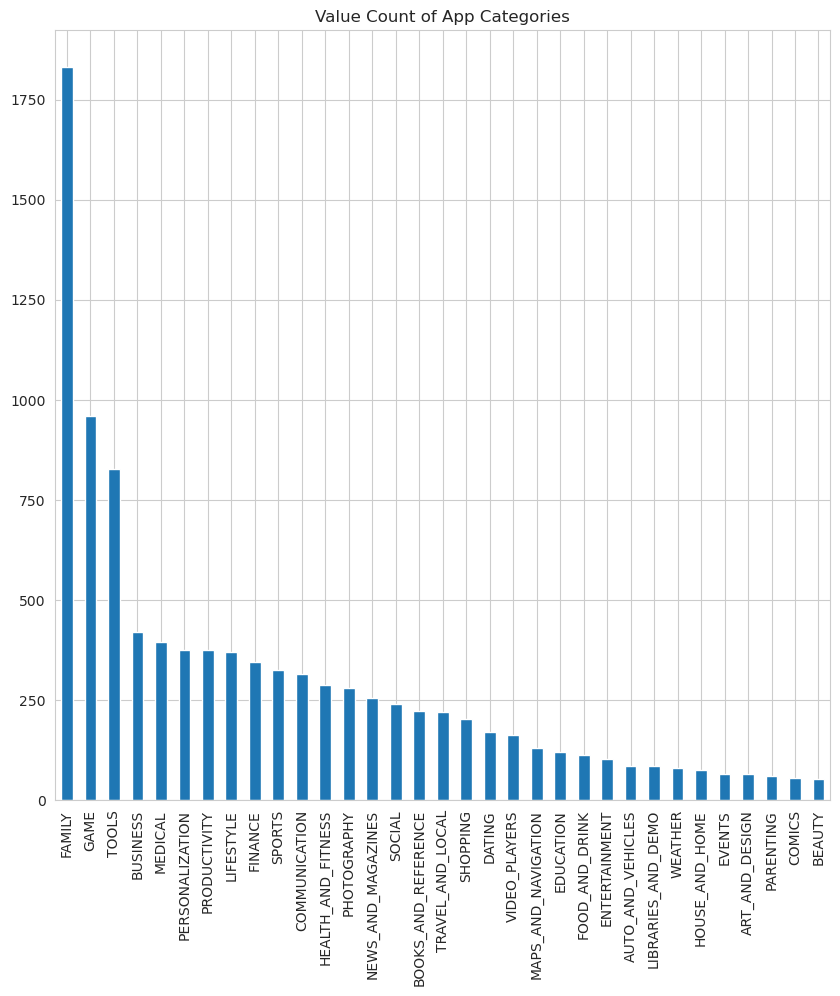

In [30]:
df_playstore['Category'].value_counts().plot(kind='bar',figsize=(10,10),title='Value Count of App Categories')

In [31]:
df_playstore.groupby(by='Category').mean()['Rating'].sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
HEALTH_AND_FITNESS     4.243033
SHOPPING               4.230000
SPORTS                 4.216154
AUTO_AND_VEHICLES      4.190411
PRODUCTIVITY           4.183389
COMICS                 4.181481
FAMILY                 4.179664
LIBRARIES_AND_DEMO     4.178125
FOOD_AND_DRINK         4.172340
MEDICAL                4.166552
PHOTOGRAPHY            4.157414
HOUSE_AND_HOME         4.150000
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.121569
COMMUNICATION          4.121484
FINANCE                4.115563
BUSINESS               4.098479
LIFESTYLE              4.093355
TRAVEL_AND_LOCAL       4.069519
VIDEO_PLAYERS          4.044595
TOOLS                  4.039554

<AxesSubplot: title={'center': 'Average Review per category'}, xlabel='Category'>

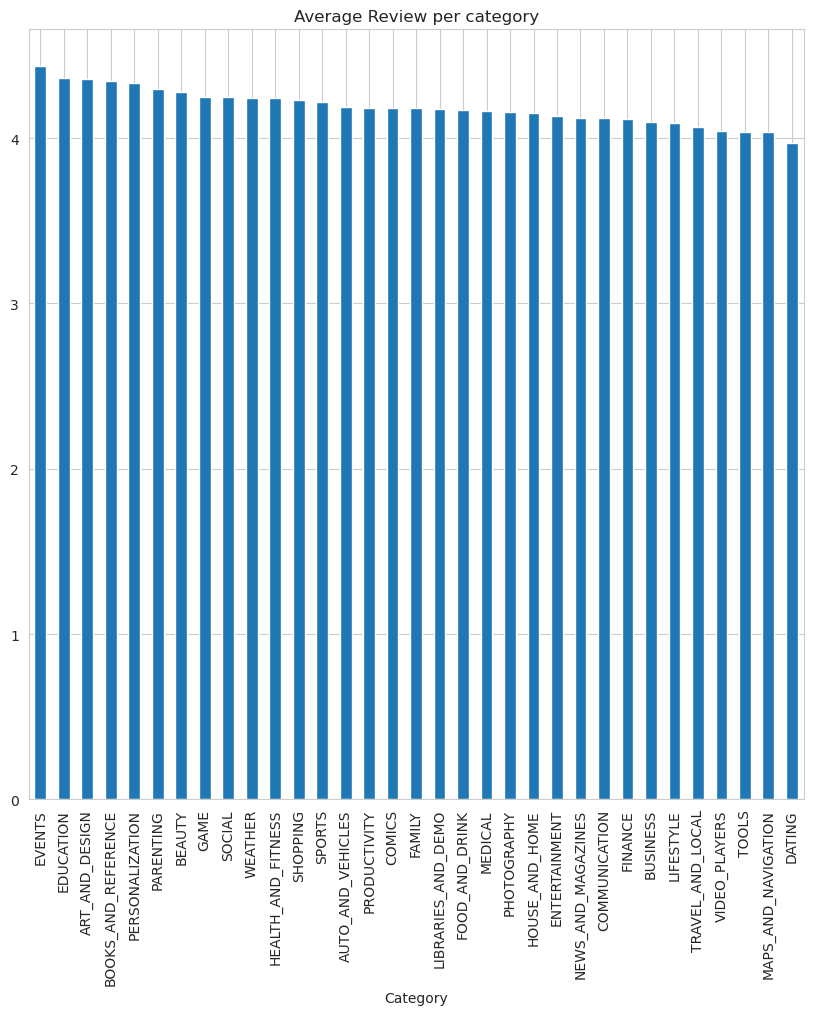

In [32]:
df_playstore.groupby(by='Category').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',
                                                                                  figsize=(10,10),
                                                                                  title = 'Average Review per category')

In [33]:
df_playstore.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

<AxesSubplot: title={'center': 'Total Installs per category'}, xlabel='Category'>

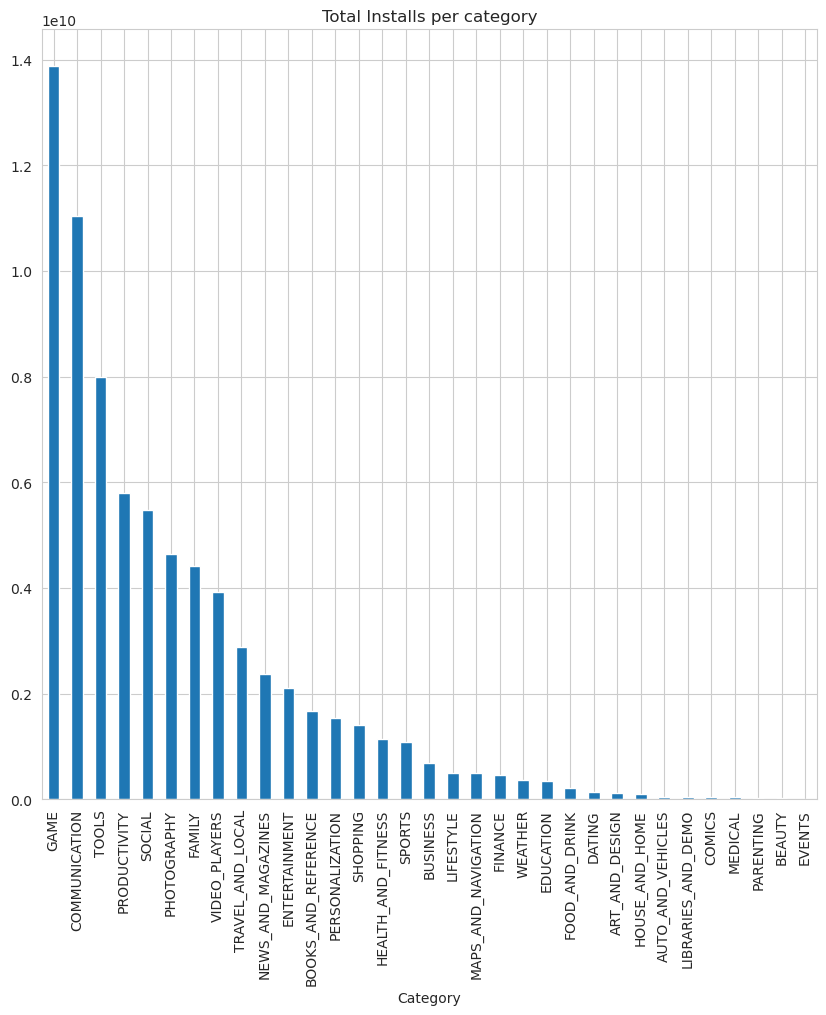

In [34]:
df_playstore.groupby(by='Category').sum()['Installs'].sort_values(ascending=False).plot(kind='bar',
                                                                                   figsize=(10,10),
                                                                                   title='Total Installs per category')

#### Insight regarding app categories:
1. Top 3 app Categories with highest value count are : Family, Game, Tools
2. Top 3 app Categories with highest average rating are : Game, Communication and Tools
3. Top 3 app Categories with highest installs are : Game, Communication and Tools

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:
1. Number of downloads: This would indicate how popular an app is among users.
2. Rating: A higher rating indicates that users are satisfied with the app.
3. Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.
4. Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.
5. Price: The price of the app could provide insights into the developer's pricing strategy.
6. App size: The size of the app could impact its popularity and the user experience.

To present the findings, we could use various data visualizations such as:
Bar charts and pie charts to represent the number of downloads and rating of the apps.
1. Scatter plots and bubble charts to analyze the correlation between the number of downloads, rating, and price.
2. Heat maps to analyze the distribution of apps across different categories.
3. Line graphs to represent the trend in the number of reviews over time.
4. Tables and charts to compare the performance of different app developers.
5. Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, price, and rating.

Overall, the combination of these features and visualizations could provide valuable insights to the mobile app development company and help them make data-driven decisions about which app developers to work with.

In [35]:
df_playstore.sort_values(by=['Installs','Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,NaN,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [37]:
df_playstore.corr()

,Rating,Size,Installs,Price
Rating,1.000000,0.061223,0.040143,-0.021199
Size,0.061223,1.000000,0.133988,-0.022141
Installs,0.040143,0.133988,1.000000,-0.009405
Price,-0.021199,-0.022141,-0.009405,1.000000


In [39]:
df_playstore.groupby(by=['Category','Installs']).mean()['Rating']

Category        Installs
ART_AND_DESIGN  0                NaN
                100         5.000000
                1000        4.366667
                5000        4.375000
                10000       4.445455
                              ...   
WEATHER         500000      4.428571
                1000000     4.233333
                5000000     4.100000
                10000000    4.340000
                50000000    4.425000
Name: Rating, Length: 512, dtype: float64

In [40]:
df_playstore.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10]

Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Adventure;Brain Games          4.600000
Puzzle;Education               4.600000
Strategy;Action & Adventure    4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Racing;Pretend Play            4.500000
Tools;Education                4.500000
Name: Rating, dtype: float64

<AxesSubplot: title={'center': 'Genres vs Average Rating'}, xlabel='Genres'>

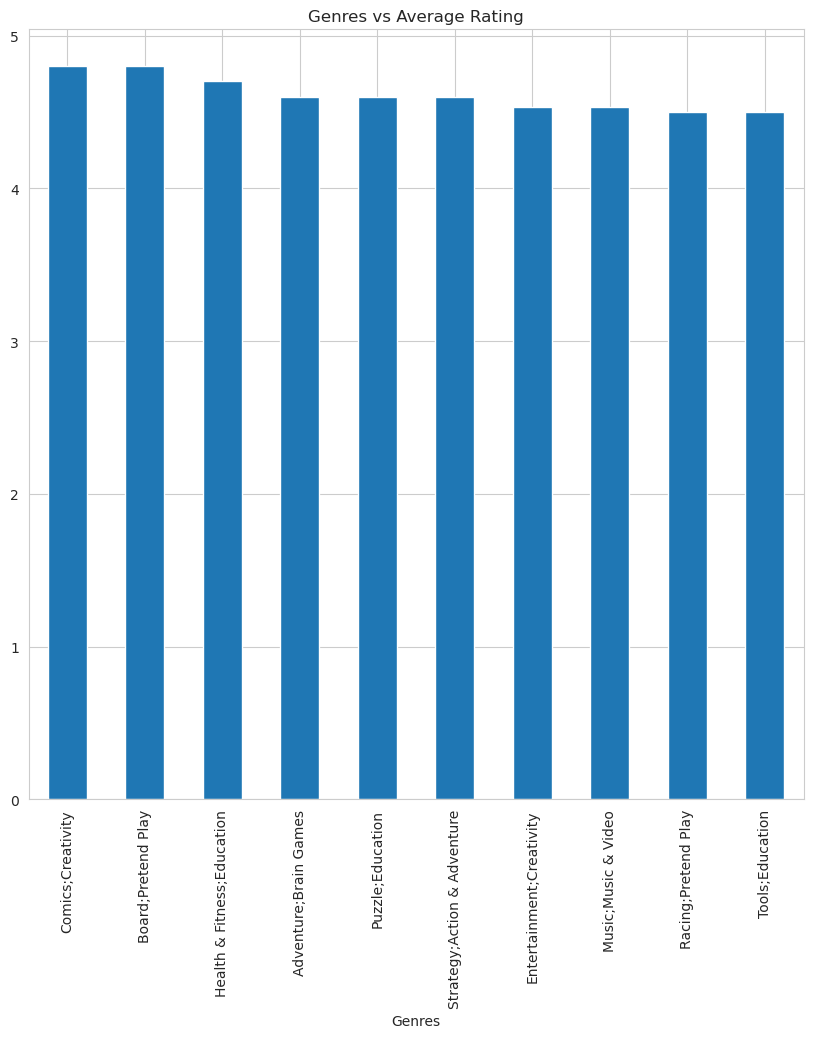

In [42]:
df_playstore.groupby(by='Genres').mean()['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',
                                                                                      figsize=(10,10),
                                                                                      title='Genres vs Average Rating')

In [43]:
df_playstore.groupby(by='Type').mean()['Rating']

Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64

<AxesSubplot: xlabel='Type'>

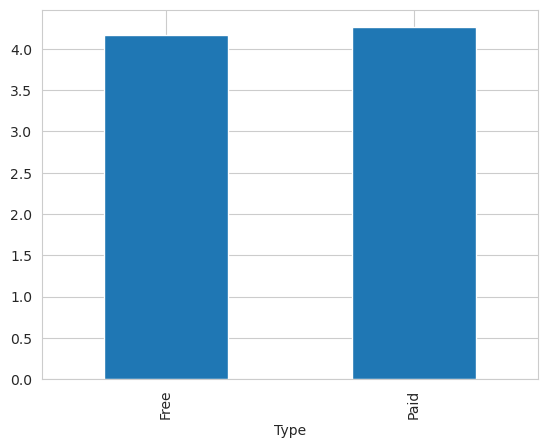

In [44]:
df_playstore.groupby(by='Type').mean()['Rating'].plot(kind='bar')

In [46]:
df_playstore.groupby(by='Type').sum()['Installs']

Type
Free    75065572646
Paid       57364881
Name: Installs, dtype: int64

<AxesSubplot: xlabel='Type'>

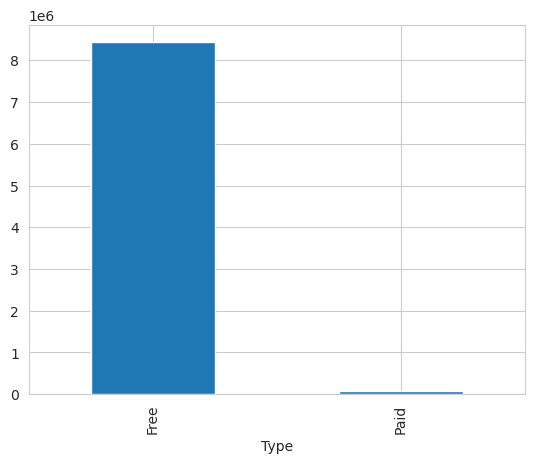

In [47]:
df_playstore.groupby(by='Type').mean()['Installs'].plot(kind='bar')

### Insights :
1. Top 3 apps with highest Installs and Ratings are : Subway Surfers, Instagram and Google Photos
2. Top 3 Genres with highest Average Rating are : Comics , Board, Health and fitness
3. Paid apps have slightly better average Rating
4. Free apps are installed a lot when compared to Paid apps.
Q

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app, we would need to analyze various features such as:

1. Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).
2. Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.
3. Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.
4. Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.
5. User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.

To present the findings, we could use various data visualizations such as:
1. Line graphs to represent the trend in the number of downloads, rating, and reviews over time.
2. Heat maps to analyze the distribution of app downloads by month and day of the week.
3. Bar charts to represent the performance of competing apps in a particular category.
4. Scatter plots to analyze the correlation between the number of downloads, rating, and reviews and the time of the year.
5. Interactive dashboards that allow users to filter and explore the data based on different criteria such as category, user demographics, and time of the year.

Overall, the combination of these features and visualizations could provide valuable insights to the marketing research firm and help them make data-driven decisions about when to launch a new app.

In [49]:
df_playstore['Last Updated']= pd.to_datetime(df_playstore['Last Updated'])
df_playstore['day'] = df_playstore['Last Updated'].dt.day
df_playstore['month'] = df_playstore['Last Updated'].dt.month
df_playstore['year'] = df_playstore['Last Updated'].dt.year
df_playstore['day_name'] = df_playstore['Last Updated'].dt.day_name()

In [50]:
df_playstore.groupby(by='month').mean()['Rating']

month
1     4.139637
2     4.093596
3     4.105143
4     4.142048
5     4.145722
6     4.166932
7     4.233886
8     4.275320
9     4.040400
10    4.014658
11    4.114085
12    4.061585
Name: Rating, dtype: float64

<AxesSubplot: xlabel='month'>

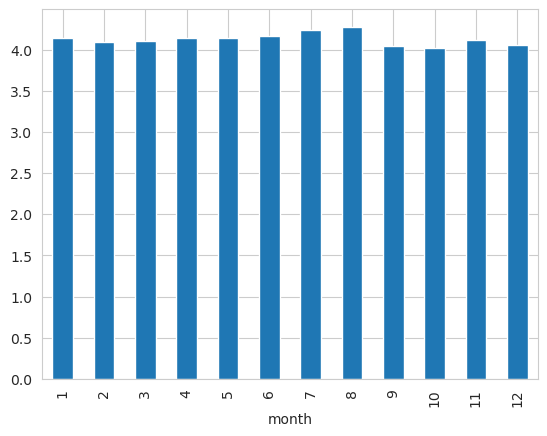

In [51]:
df_playstore.groupby(by='month').mean()['Rating'].plot(kind='bar')

In [52]:
df_playstore.groupby(by='month').sum()['Installs'].sort_values(ascending=False)

month
8     31031058529
7     28645201819
6      4854349574
5      3646908327
4      1455524919
12     1037049147
1      1031288286
11      895133297
3       894067825
2       769351455
10      448042024
9       414962325
Name: Installs, dtype: int64

<AxesSubplot: xlabel='month'>

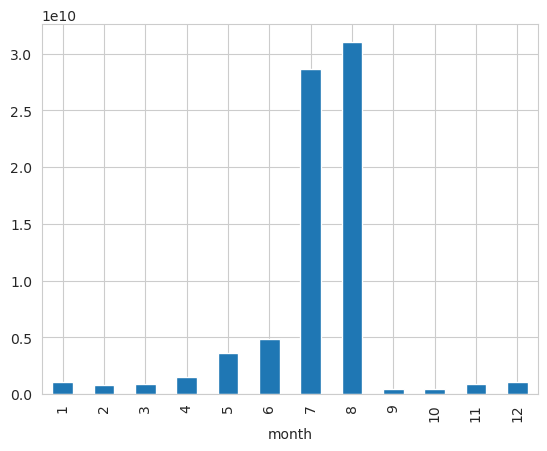

In [53]:
df_playstore.groupby(by='month').sum()['Installs'].plot(kind='bar')

In [54]:
df_playstore.groupby(by='day_name').mean()['Rating']

day_name
Friday       4.193084
Monday       4.140881
Saturday     4.200332
Sunday       4.257000
Thursday     4.173919
Tuesday      4.167173
Wednesday    4.149077
Name: Rating, dtype: float64

<AxesSubplot: xlabel='day_name'>

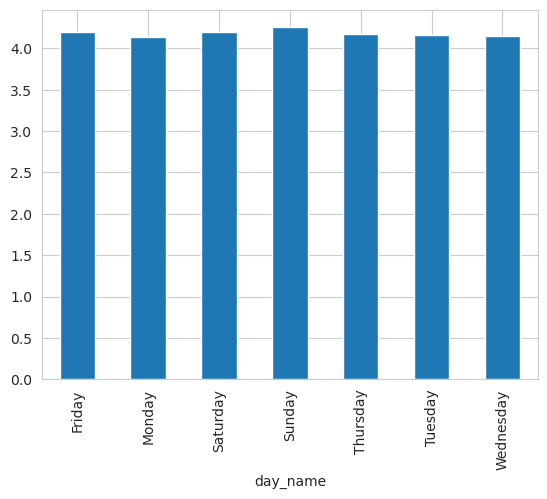

In [55]:
df_playstore.groupby(by='day_name').mean()['Rating'].plot(kind='bar')

In [56]:
df_playstore.groupby(by='day_name').sum()['Installs']

day_name
Friday       14919881501
Monday       15188437716
Saturday      3738889768
Sunday        1476098239
Thursday     15647017508
Tuesday      10723164323
Wednesday    13429448472
Name: Installs, dtype: int64

<AxesSubplot: xlabel='day_name'>

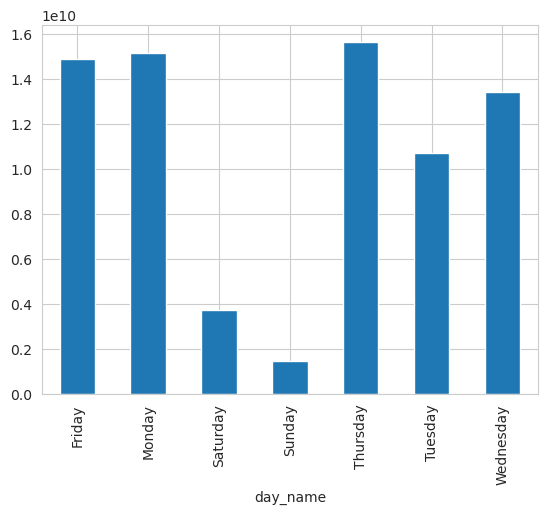

In [57]:
df_playstore.groupby(by='day_name').sum()['Installs'].plot(kind='bar')

In [58]:
df_playstore.groupby(by=['year']).sum()['Installs']

year
2010         100000
2011       17407100
2012       13992210
2013      103086365
2014      269785226
2015      405339475
2016     1292365793
2017     2893100739
2018    70127760619
Name: Installs, dtype: int64

<AxesSubplot: xlabel='year'>

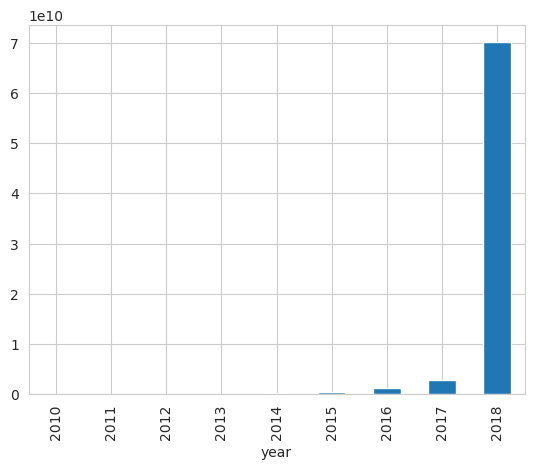

In [60]:
df_playstore.groupby(by=['year']).sum()['Installs'].plot(kind='bar')

### Insights :
1. Average Reviews are almost same regardless of month or day of week.
2. Most Apps are installed in month of August
3. Most Apps are installed in day of week : Thursday
4. App installs are increasing rapidly with each year